<a href="https://colab.research.google.com/github/MedchalMouni/Weights-predictor/blob/main/weightpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/diazoniclabs/Microland/main/knn.csv")
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


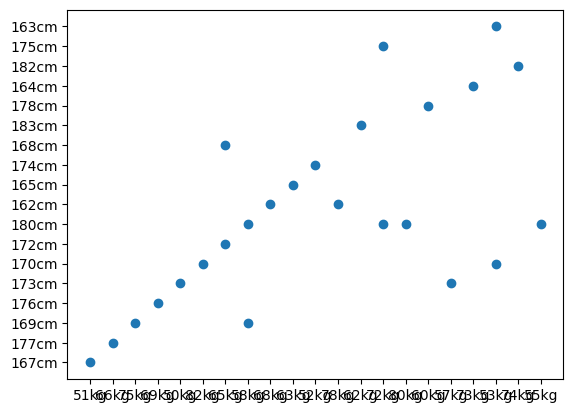

In [4]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])

In [5]:
df['Weight(x2)kg']=df['Weight(x2)kg'].apply(lambda x:x [0:-2]).astype(int)

In [6]:
df['Height(y2)cm']=df['Height(y2)cm'].apply(lambda y:y [0:-2]).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


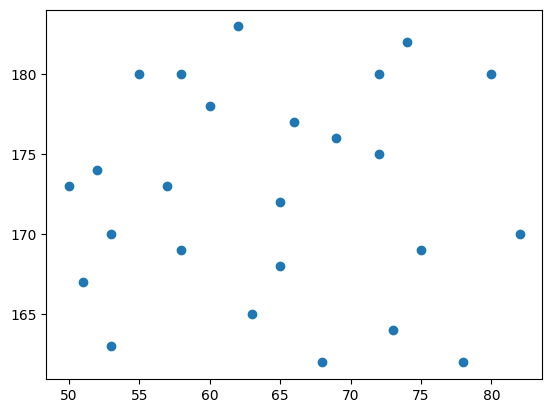

In [8]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])

# **Creating 3 sub Data frame**

In [9]:
w=df['Class'].unique()

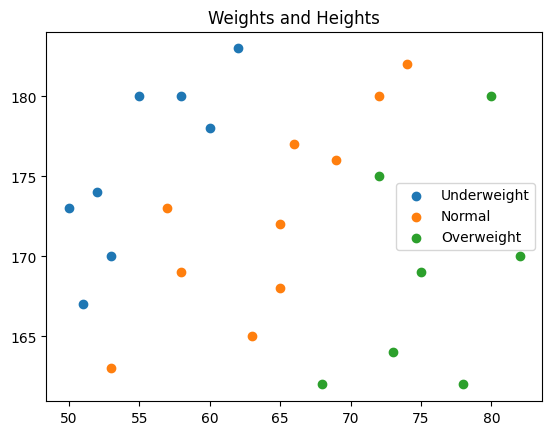

In [10]:
#class value is Underweight
uw=df[df['Class']==w[0]]

#class value is Normalweight
nw=df[df['Class']==w[1]]

#class value is Overweight
ow=df[df['Class']==w[2]]

plt.scatter(uw['Weight(x2)kg'],uw['Height(y2)cm'],label=w[0])
plt.scatter(nw['Weight(x2)kg'],nw['Height(y2)cm'],label=w[1])
plt.scatter(ow['Weight(x2)kg'],ow['Height(y2)cm'],label=w[2])
plt.legend()
plt.title('Weights and Heights')
plt.show()

# **ML**: **Classification**

In [11]:
#copy paste from sklearn.tree.DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [12]:
x=df[['Weight(x2)kg','Height(y2)cm']]
y=df['Class']
clf.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [13]:
clf.predict([[65,180]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

In [17]:
import joblib
joblib.dump(clf,'model_new')

['model_new']

# **Deployment**
-> create a website
-> streamlit -->build and share data apps (python)
-> create a streamlit
-> deploy it on cloud


In [14]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=1726cb0ee302785c45f0dddaf824c3eaf151452f31b3461b936de4aa51db198c
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [19]:
%%writefile app.py
import streamlit as st
import joblib

st.title("Weights Predictor")
weight = st.slider('What is your weight?', 0, 100, 25)
height = st.slider('What is your height?', 0, 200, 25)
model=joblib.load('model_new')
result=model.predict([[weight,height]])[0]

if st.button("Predict"):
  st.write(f"You are {result}")

Overwriting app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.159.201:8501

npx: installed 22 in 3.925s
your url is: https://flat-steaks-film.loca.lt
